# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bryan Dewa Wicaksana
- **Email:** m288d4ky3223@bangkit.academy
- **ID Dicoding:** lynxcool

## Menentukan Pertanyaan Bisnis

- Apa Tren Kualitas Udara di setiap stasiun?
- Apa hubungan besarnya ozon dengan kualitas udara?
- Apa Pengaruh Cuaca Terhadap Kualitas Udara?
- Apa Tren arah mata angin?

## Import Semua Packages/Library yang Digunakan

In [1]:
#import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from math import radians, sin, cos, sqrt, atan2

## Data Wrangling

### Gathering Data

In [2]:
list_url = [
    "data//PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "data//PRSA_Data_Changping_20130301-20170228.csv",
    "data//PRSA_Data_Dingling_20130301-20170228.csv",
    "data//PRSA_Data_Dongsi_20130301-20170228.csv",
    "data//PRSA_Data_Guanyuan_20130301-20170228.csv",
    "data//PRSA_Data_Gucheng_20130301-20170228.csv",
    "data//PRSA_Data_Huairou_20130301-20170228.csv",
    "data//PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "data//PRSA_Data_Shunyi_20130301-20170228.csv",
    "data//PRSA_Data_Tiantan_20130301-20170228.csv",
    "data//PRSA_Data_Wanliu_20130301-20170228.csv",
    "data//PRSA_Data_Wanshouxigong_20130301-20170228.csv",
]

#loop each url and read csv into dataframe
dataframes = []
for url in list_url:
    df = pd.read_csv(url)
    dataframes.append(df)

#concatenate all dataframes into single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

#create coordinate data
coordinate_data = {
    'station': ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'],
    'lat': [41.7445, 40.0894, 40.26667, 39.9320, 39.931582269992155, 40.544199122752225, 40.3971, 39.983246, 40.0577, 39.8822, 39.9977, 40.69387750068584],
    'long': [123.4566, 116.3031, 116.26667, 116.4341, 116.36101915343265, 116.02808457671634, 116.6878, 116.4883, 116.8665, 116.4066, 116.2576, 117.15950305658203]
}

coordinate_df = pd.DataFrame(coordinate_data)

merged_df = pd.merge(merged_df, coordinate_df, on='station')

merged_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,lat,long
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,41.7445,123.4566
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,41.7445,123.4566
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,41.7445,123.4566
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,41.7445,123.4566
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,41.7445,123.4566


- year: Tahun pengukuran.
- month: Bulan pengukuran.
- day: Hari pengukuran.
- hour: Jam pengukuran.
- PM2.5: Partikel Matter dengan diameter kurang dari atau sama dengan 2.5 mikrometer.
- PM10: Partikel Matter dengan diameter kurang dari atau sama dengan 10 mikrometer.
- SO2: Dioksida belerang (Sulfur Dioxide).
- NO2: Dioksida nitrogen (Nitrogen Dioxide).
- CO: Karbon Monoksida.
- O3: Ozon.
- TEMP: Suhu udara.
- PRES: Tekanan udara.
- DEWP: Titik embun (Dew Point).
- RAIN: Jumlah hujan.
- wd: Arah angin (Wind Direction).
- WSPM: Kecepatan angin (Wind Speed).
- station: Nama stasiun pengukuran.

### Assessing Data

In [251]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  lat      420768 non-null  float64
 19  long     420768 non-null  float64
dtypes: float64(13), int64(5), 

diatas banyak data yang hilang, maka akan kita mentotalkan data yang hilang berjumlah berapa

In [252]:
merged_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
lat            0
long           0
dtype: int64

**list kolom data yang ada kosong**

In [253]:
merged_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,lat,long
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,40.293348,117.059656
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,0.504303,1.950375
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,39.882200,116.028085
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,39.970435,116.293993
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,40.073550,116.420350
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,40.433875,116.732475
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,41.744500,123.456600


In [254]:
merged_df.duplicated().sum()

0

**tidak ada data duplikat**

In [255]:
len(merged_df["station"].unique())

12

terdapat 12 station unique

### Cleaning Data

In [256]:
merged_df[merged_df["CO"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,lat,long
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin,41.744500,123.456600
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin,41.744500,123.456600
171,172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin,41.744500,123.456600
178,179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin,41.744500,123.456600
267,268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin,41.744500,123.456600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420709,35006,2017,2,26,13,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong,40.693878,117.159503
420731,35028,2017,2,27,11,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong,40.693878,117.159503
420732,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong,40.693878,117.159503
420733,35030,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong,40.693878,117.159503


terdapat pola data yang mana hanya kolom `CO` nya saja yang kosong, lalu ada kolom `CO` disertai dengan kolom lainnya yang kosong, selanjutnya saya mau menghapus baris dimana bila kolom **`CO` dan kolom lainnya juga kosong** karena data kolom `CO` yang kosong cukup signifikan

In [257]:
merged_df.dropna(subset=merged_df.columns.difference(['CO']), inplace=True)

In [258]:
merged_df[merged_df["CO"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,lat,long
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.200000,1016.9,-11.6,0.0,N,2.8,Aotizhongxin,41.744500,123.456600
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.900000,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin,41.744500,123.456600
171,172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0,1.800000,997.9,-1.8,0.0,N,0.0,Aotizhongxin,41.744500,123.456600
178,179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0,19.100000,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin,41.744500,123.456600
267,268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0,6.400000,1005.8,-1.0,0.1,N,2.2,Aotizhongxin,41.744500,123.456600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419724,34021,2017,1,16,12,3.0,33.0,12.0000,63.0000,NaN,41.0,-0.933333,1029.0,-7.2,0.0,NE,1.4,Wanshouxigong,40.693878,117.159503
419764,34061,2017,1,18,4,43.0,43.0,16.0000,45.0000,NaN,36.0,-5.325000,1031.0,-12.0,0.0,NE,2.1,Wanshouxigong,40.693878,117.159503
419919,34216,2017,1,24,15,3.0,218.0,3.0000,107.0000,NaN,15.0,1.900000,1032.0,-14.9,0.0,SE,2.2,Wanshouxigong,40.693878,117.159503
420090,34387,2017,1,31,18,83.0,107.0,27.0000,45.0000,NaN,68.0,3.100000,1023.3,-21.9,0.0,WSW,2.6,Wanshouxigong,40.693878,117.159503


selanjutnya akan menerapkan metode imputasi dengan cara mengisi kolom `CO` yang kosong dengan rata rata nilai `CO`

In [259]:
merged_df['CO'].fillna(merged_df['CO'].mean(), inplace=True)
merged_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
lat        0
long       0
dtype: int64

sudah tidak ada lagi data yang duplikat

In [260]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393466 entries, 0 to 420767
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       393466 non-null  int64  
 1   year     393466 non-null  int64  
 2   month    393466 non-null  int64  
 3   day      393466 non-null  int64  
 4   hour     393466 non-null  int64  
 5   PM2.5    393466 non-null  float64
 6   PM10     393466 non-null  float64
 7   SO2      393466 non-null  float64
 8   NO2      393466 non-null  float64
 9   CO       393466 non-null  float64
 10  O3       393466 non-null  float64
 11  TEMP     393466 non-null  float64
 12  PRES     393466 non-null  float64
 13  DEWP     393466 non-null  float64
 14  RAIN     393466 non-null  float64
 15  wd       393466 non-null  object 
 16  WSPM     393466 non-null  float64
 17  station  393466 non-null  object 
 18  lat      393466 non-null  float64
 19  long     393466 non-null  float64
dtypes: float64(13), int64(5), objec

dan masih ada 393466 index dari 420768 index, yang mana hanya kehilangan **6.48%** data

In [261]:
merged_df[merged_df["CO"] == merged_df["CO"].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,lat,long
24126,24127,2015,12,1,6,453.0,453.0,31.0,184.0,10000.0,10.0,-0.8,1015.9,-1.4,0.0,ESE,0.6,Aotizhongxin,41.744500,123.456600
24705,24706,2015,12,25,9,412.0,452.0,13.0,143.0,10000.0,12.0,-3.6,1016.0,-3.7,0.0,SE,1.5,Aotizhongxin,41.744500,123.456600
24817,24818,2015,12,30,1,472.0,523.0,60.0,156.0,10000.0,15.0,-3.9,1024.0,-4.9,0.0,E,1.1,Aotizhongxin,41.744500,123.456600
33382,33383,2016,12,20,22,371.0,371.0,6.0,153.0,10000.0,3.0,0.0,1026.0,-1.9,0.0,S,1.2,Aotizhongxin,41.744500,123.456600
33383,33384,2016,12,20,23,397.0,397.0,6.0,157.0,10000.0,3.0,-0.3,1026.2,-2.0,0.0,ESE,0.9,Aotizhongxin,41.744500,123.456600
42492,7429,2014,1,4,12,92.0,102.0,61.0,59.0,10000.0,17.0,1.8,1011.7,-5.6,0.0,SSE,1.3,Changping,40.089400,116.303100
68458,33395,2016,12,21,10,398.0,407.0,9.0,127.0,10000.0,3.0,-0.8,1018.5,-2.5,0.0,NNW,1.0,Changping,40.089400,116.303100
103874,33747,2017,1,5,2,413.0,418.0,6.0,126.0,10000.0,2.0,-2.0,1020.7,-2.7,0.0,NNW,1.3,Dingling,40.266670,116.266670
125007,19816,2015,6,4,15,40.0,40.0,4.0,32.0,10000.0,74.0,17.8,998.8,15.8,1.9,S,1.9,Dongsi,39.932000,116.434100
125015,19824,2015,6,4,23,48.0,48.0,7.0,34.0,10000.0,68.0,19.4,996.5,13.6,0.0,W,1.5,Dongsi,39.932000,116.434100


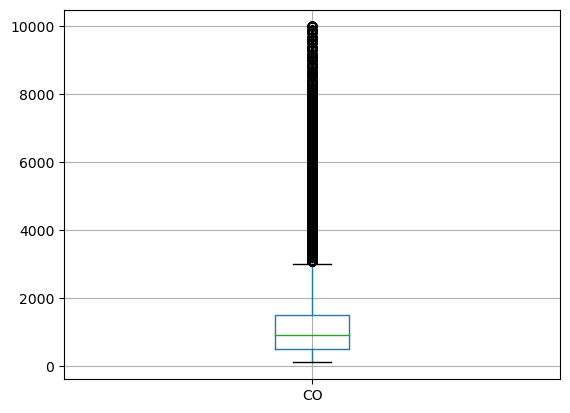

In [262]:
merged_df.boxplot(column='CO')
plt.show()

lalu dilihat dari boxplot, sudah dipastikan itu outlier, **NAMUN** perlu diketahui cara penghitungan CO dimana min adalah 100 dan max adalah 10000, kalau dihitung kira-kira akan menghasilkan

min = 0.136ppm
max = 13.575ppm

yang mana nilai max berada diatas nilai 9 ppm dan kurang dari 50 ppm, bisa dikatakan nilai tersebut adalah kebetulan sedang ada sesuatu pada hari itu

## Exploratory Data Analysis (EDA)

### Explore mencari tren kualitas udara tiap station

In [263]:
merged_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,lat,long
count,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466.000000,393466,393466.000000,393466,393466.000000,393466.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Nongzhanguan,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40353,NaN,33836,NaN,NaN
mean,17650.290782,2014.676163,6.521115,15.726236,11.574853,79.524189,104.542278,15.733427,50.541464,1229.940563,57.316815,13.549858,1010.766635,2.446233,0.064725,NaN,1.737390,NaN,40.293037,117.054126
std,10103.695937,1.175984,3.450536,8.789878,6.923911,80.569622,91.684598,21.360122,35.062548,1140.417182,56.660783,11.430568,10.463834,13.822993,0.827580,NaN,1.242463,NaN,0.503587,1.944849
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN,39.882200,116.028085
25%,9034.000000,2014.000000,4.000000,8.000000,6.000000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.105000,1002.300000,-9.000000,0.000000,NaN,0.900000,NaN,39.932000,116.303100
50%,17722.000000,2015.000000,7.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,40.089400,116.406600
75%,26337.750000,2016.000000,10.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,40.544199,116.687800


In [264]:
merged_df.groupby(by=["station"]).agg({
    "PM2.5": "mean",
    "PM10": "mean"
})

,PM2.5,PM10
station,,
Aotizhongxin,82.237590,109.606385
Changping,70.948803,94.508237
Dingling,66.660034,84.545174
Dongsi,85.129510,110.143793
Guanyuan,82.610216,108.633988
Gucheng,83.867186,119.019981
Huairou,70.217951,92.496808
Nongzhanguan,84.782776,109.215087
Shunyi,79.245241,99.144428


informasi diatas adalah nilai partikel rata-rata tiap station dari tahun 2013 - 2017

In [265]:
merged_df.groupby(by=["station", "year"]).agg({
    "PM2.5": "mean",
    "PM10": "mean"
})

PM2.5        PM10
station       year                        
Aotizhongxin  2013   80.909900  111.191594
              2014   90.151639  121.603054
              2015   81.822359  112.242154
              2016   73.888242   94.277576
              2017   95.271988  107.985218
Changping     2013   72.998159   91.920278
              2014   78.969939  106.004837
              2015   69.460227   93.762785
              2016   61.337094   86.071227
              2017   80.110866   94.489721
Dingling      2013   67.443439   80.923077
              2014   75.123386   91.368175
              2015   64.327043   85.186917
              2016   59.413550   80.804936
              2017   68.446244   78.801178
Dongsi        2013   87.765160  106.410755
              2014   82.455443  114.796113
              2015   87.271452  111.991274
              2016   80.278414  103.525250
              2017  102.872768  132.295387
Guanyuan      2013   80.388350  105.823239
              2014   88.280058  116.135808
              2015   82.505660  106.665842
              2016   77.306629  105.090068
              2017   93.065660  111.288302
Gucheng       2013   82.558270  113.737893
              2014   88.898238  133.435238
              2015   83.619725  116.237883
              2016   77.468105  110.866088
              2017  102.030973  127.675516
Huairou       2013   70.611818   97.580025
              2014   77.432043  100.598792
              2015   71.187118   90.472562
              2016   61.163395   82.545633
              2017   73.842889   91.784066
Nongzhanguan  2013   84.567605  103.994424
              2014   90.218422  125.626371
              2015   85.843068  107.918855
              2016   75.927765   97.030706
              2017  101.354505  120.203840
Shunyi        2013   77.422782   97.335585
              2014   84.489138  110.877371
              2015   80.631678   99.450717
              2016   71.312089   86.917626
              2017   92.617103  104.201079
Tiantan       2013   83.638815  108.625474
              2014   86.474428  113.048482
              2015   81.864166  102.338158
              2016   73.943341   97.327336
              2017   97.505926  125.655556
Wanliu        2013   87.871034  107.876322
              2014   87.578292  129.326758
              2015   80.749466  105.104336
              2016   71.467281   93.019500
              2017   94.401910  111.055841
Wanshouxigong 2013   82.244554  109.186120
              2014   88.381408  126.120270
              2015   84.468311  110.970588
              2016   78.124013   99.031357
              2017  108.024609  123.556301

informasi diatas menggambarkan rata-rata partikel halus dan partikel kasar di setiap stasion per tahunnya

In [266]:
#mendapatkan mean dengan station
temp_df = merged_df.groupby(by=["station"]).agg({
    "PM2.5": "mean",
    "PM10": "mean"
}).reset_index()

#mendapatkan min dan max mean per station
min_pm25 = temp_df[temp_df['PM2.5'] == temp_df['PM2.5'].min()].reset_index().station[0]
max_pm25 = temp_df[temp_df['PM2.5'] == temp_df['PM2.5'].max()].reset_index().station[0]

#select baris berdasarkan min dan max diatas pada dataframe yang ada year nya
temp_station_year_pm25_df = merged_df.groupby(by=["station", "year"]).agg({
    "PM2.5": "mean",
}).reset_index()
min_n_max_pm25_df = temp_station_year_pm25_df[(temp_station_year_pm25_df['station'] == min_pm25) | (temp_station_year_pm25_df['station'] == max_pm25)]
min_n_max_pm25_df

,station,year,PM2.5
10,Dingling,2013,67.443439
11,Dingling,2014,75.123386
12,Dingling,2015,64.327043
13,Dingling,2016,59.413550
14,Dingling,2017,68.446244
15,Dongsi,2013,87.765160
16,Dongsi,2014,82.455443
17,Dongsi,2015,87.271452
18,Dongsi,2016,80.278414
19,Dongsi,2017,102.872768


informasi diatas perbandingan antara station dengan PM2.5 terendah dengan tertinggi

In [267]:
#mendapatkan min dan max mean per station
min_pm10 = temp_df[temp_df['PM10'] == temp_df['PM10'].min()].reset_index().station[0]
max_pm10 = temp_df[temp_df['PM10'] == temp_df['PM10'].max()].reset_index().station[0]

#select baris berdasarkan min dan max diatas pada dataframe yang ada year nya
temp_station_year_pm10_df = merged_df.groupby(by=["station", "year"]).agg({
    "PM10": "mean",
}).reset_index()
temp_station_year_pm10_df[(temp_station_year_pm10_df['station'] == min_pm10) | (temp_station_year_pm10_df['station'] == max_pm10)]

,station,year,PM10
10,Dingling,2013,80.923077
11,Dingling,2014,91.368175
12,Dingling,2015,85.186917
13,Dingling,2016,80.804936
14,Dingling,2017,78.801178
25,Gucheng,2013,113.737893
26,Gucheng,2014,133.435238
27,Gucheng,2015,116.237883
28,Gucheng,2016,110.866088
29,Gucheng,2017,127.675516


informasi diatas perbandingan antara station dengan PM10 terendah dengan tertinggi

In [268]:
merged_df.groupby(by=["station"]).agg({
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
})

,SO2,NO2,CO,O3
station,,,,
Aotizhongxin,17.264858,59.011377,1255.963718,56.474802
Changping,14.982083,44.187262,1153.837844,57.580915
Dingling,11.981296,27.576839,928.829792,68.567944
Dongsi,17.357281,53.735193,1310.003357,57.385820
Guanyuan,17.325815,57.455430,1264.736933,55.850283
Gucheng,15.360451,55.805166,1323.012799,57.842216
Huairou,12.338981,32.628366,1035.277593,59.786902
Nongzhanguan,18.720989,58.154783,1325.696568,58.476739
Shunyi,13.981728,44.407718,1202.598686,55.270282


informasi diatas adalah nilai rata-rata dari gas polutan per station dari tahun 2013-2017

In [269]:
merged_df.groupby(by=["station", "year"]).agg({
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
})

SO2        NO2           CO         O3
station       year                                              
Aotizhongxin  2013  23.123604  62.043835  1145.204901  50.140721
              2014  21.313411  64.113785  1186.974725  49.370447
              2015  14.504067  60.893514  1400.971850  63.750421
              2016  10.814909  48.517697  1196.893268  62.606667
              2017  20.851441  66.330377  1677.028210  47.546194
Changping     2013  19.585517  41.298233  1063.256557  61.057021
              2014  21.000836  45.596286  1192.671413  62.330527
              2015  11.788488  42.648691  1161.673541  57.609376
              2016   8.109074  45.592501  1122.563127  53.867184
              2017  16.477239  51.088106  1532.459313  33.383994
Dingling      2013  14.750747  29.640173   934.079070  64.856324
              2014  14.700876  27.392229   885.354212  72.668661
              2015  11.285352  26.847171   967.479230  71.210710
              2016   7.369349  25.679889   889.793748  67.103136
              2017  13.282032  34.243741  1154.771461  54.016200
Dongsi        2013  24.162605  57.702281  1302.404645  63.598896
              2014  19.384228  55.831779  1306.617179  58.661037
              2015  15.141245  50.430510  1339.084150  55.335370
              2016  11.596963  51.242738  1246.914368  55.951669
              2017  20.145089  57.654762  1572.953206  39.752232
Guanyuan      2013  20.955146  56.243880  1163.136097  58.849137
              2014  23.129888  63.868256  1356.662804  55.365721
              2015  14.101400  55.008041  1317.291337  56.623130
              2016  11.603771  53.720895  1178.681575  54.774772
              2017  21.163774  63.381132  1405.003280  46.110943
Gucheng       2013  17.552408  61.767874  1286.587091  56.464580
              2014  19.996709  62.105004  1425.431044  58.894983
              2015  13.426926  49.600646  1326.554953  60.795706
              2016  10.202978  49.903494  1175.715151  59.674953
              2017  20.523599  62.601770  1797.175122  28.831858
Huairou       2013  17.680766  36.099959  1035.759330  59.918074
              2014  17.709379  37.496672  1065.555434  66.718351
              2015   8.811441  28.868030  1056.969117  60.534569
              2016   6.717125  27.748160   937.288455  54.122547
              2017   9.698436  38.906180  1313.677934  47.141474
Nongzhanguan  2013  23.313768  59.613500  1301.769131  56.173227
              2014  24.573989  62.051508  1336.610742  59.765849
              2015  15.924687  58.807748  1388.100167  60.981583
              2016  11.598471  52.436941  1213.526248  60.157059
              2017  20.446824  58.201625  1699.674510  36.539882
Shunyi        2013  16.143329  43.032414  1247.038962  55.130193
              2014  18.107671  46.187786  1190.116443  56.430057
              2015  10.656553  43.209587  1182.630922  53.415251
              2016  10.160225  43.437363  1109.603249  58.295230
              2017  20.605547  53.548536  1703.127340  43.627119
Tiantan       2013  18.127451  53.404660  1315.949960  54.110258
              2014  19.266555  56.035915  1316.403289  54.479830
              2015  11.872635  52.057761  1289.198816  59.746792
              2016   8.992523  50.200117  1203.781480  55.195444
              2017  13.921481  63.962222  1714.080733  35.832593
Wanliu        2013  23.793232  66.845714  1180.544029  48.854342
              2014  23.363641  74.358310  1286.636190  42.848926
              2015  15.125074  58.055976  1368.856190  52.486170
              2016  10.658930  58.338916  1235.781650  53.743869
              2017  20.294636  68.937546  1734.268134  35.852314
Wanshouxigong 2013  22.249734  54.663782  1395.680416  54.862449
              2014  21.916395  61.227116  1407.272311  57.418967
              2015  14.416781  52.980764  1358.665593  58.499561
              2016  10.650006  50.575268  1235.534472  57.040552
              2017  18.644295  64.675615  1690.049895  34.023

informasi diatas adalah rata- rata gas-gas polutan yang tersebar disetiap station per tahunnya

In [270]:
merged_df.groupby(by=["station"]).agg({
    "TEMP": "mean",
    "PRES": "mean",
    "DEWP": "mean",
    "RAIN": "mean",
    "WSPM": "mean"
})

,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,
Aotizhongxin,13.823796,1011.694063,3.300878,0.069704,1.721903
Changping,13.558160,1007.826346,1.342186,0.061125,1.858154
Dingling,13.552118,1007.854768,1.440251,0.060691,1.842135
Dongsi,13.856163,1012.446936,2.578600,0.063406,1.861508
Guanyuan,13.725879,1011.831720,3.207921,0.068916,1.724598
Gucheng,13.797408,1008.873293,2.458138,0.064430,1.357481
Huairou,12.279669,1007.812630,2.044973,0.066171,1.655192
Nongzhanguan,13.663687,1012.519837,2.461633,0.065572,1.857737
Shunyi,12.942435,1013.481529,1.755331,0.055051,1.840608


informasi diatas adalah nilai rata-rata parameter meteorologis yang dapat mempengaruhi persebaran polutan di setiap station dari tahun 2013-2017

In [271]:
merged_df.groupby(by=["station", "year"]).agg({
    "TEMP": "mean",
    "PRES": "mean",
    "DEWP": "mean",
    "RAIN": "mean",
    "WSPM": "mean"
})

TEMP         PRES       DEWP      RAIN      WSPM
station       year                                                       
Aotizhongxin  2013  16.177317  1007.841005   6.952264  0.077784  1.572336
              2014  14.482276  1010.642802   4.874075  0.060788  1.463866
              2015  13.378840  1012.711867   2.599615  0.068953  1.893574
              2016  13.893498  1012.842896   2.245333  0.083624  1.878558
              2017   0.701207  1023.540934 -13.166297  0.002735  1.974871
Changping     2013  15.793458  1005.121467   4.160748  0.064486  1.664316
              2014  14.086695  1008.169258   0.909280  0.039377  1.872220
              2015  13.441895  1007.932169   1.693568  0.085109  1.830252
              2016  13.391432  1007.950482   1.559779  0.065961  1.985860
              2017   0.467779  1018.323801 -14.108003  0.001248  2.148752
Dingling      2013  16.032127  1004.885882   4.882398  0.067044  1.611659
              2014  14.415736  1008.011796   1.398674  0.035899  1.853691
              2015  13.592751  1007.842709   1.841917  0.082054  1.827921
              2016  12.786926  1008.388182   0.841166  0.068505  1.987747
              2017   0.437108  1018.354246 -14.103682  0.001473  2.134168
Dongsi        2013  15.690031  1010.106593   4.643664  0.051344  1.814731
              2014  15.488457  1011.417925   4.188391  0.058923  1.815535
              2015  13.346648  1012.851398   2.665308  0.073099  1.927193
              2016  13.475106  1013.141920   1.825780  0.077510  1.854707
              2017   0.665133  1023.585851 -13.190476  0.002753  1.988914
Guanyuan      2013  16.586685  1007.641008   7.444182  0.080567  1.577007
              2014  13.918462  1011.303821   4.097077  0.054840  1.490575
              2015  13.420569  1012.572099   2.755923  0.073112  1.884409
              2016  13.698328  1012.944613   2.154732  0.079831  1.858948
              2017   0.669286  1023.680277 -13.361132  0.001962  2.004226
Gucheng       2013  15.925147  1006.173358   5.422733  0.067970  1.037951
              2014  14.406803  1008.877585   2.701321  0.035862  1.129757
              2015  13.947853  1009.183804   2.971483  0.082309  1.122691
              2016  13.469418  1009.187636   1.943703  0.081332  1.910378
              2017   0.340078  1018.812217 -14.151475  0.001917  2.340192
Huairou       2013  14.365167  1005.493099   5.093983  0.065385  1.413694
              2014  12.617254  1007.647400   1.841706  0.050185  1.584200
              2015  12.354090  1007.933944   2.419975  0.083140  1.735111
              2016  12.429999  1007.970986   2.070780  0.076018  1.794406
              2017  -1.135258  1018.252723 -13.789799  0.004170  1.915339
Nongzhanguan  2013  15.928129  1009.881837   5.072191  0.058601  1.809855
              2014  13.970002  1012.454393   2.682930  0.056667  1.824252
              2015  13.383411  1012.757395   2.779868  0.074947  1.904495
              2016  13.799380  1012.809995   2.220047  0.080894  1.864459
              2017   0.674031  1023.595963 -13.205835  0.002733  1.983900
Shunyi        2013  14.677019  1011.449156   4.137596  0.044366  1.844259
              2014  13.379030  1012.988130   2.030351  0.042055  1.733146
              2015  13.373802  1013.457266   2.640591  0.078558  1.798308
              2016  12.714572  1013.952316   1.046231  0.061554  1.952632
              2017   0.172029  1024.165447 -13.437519  0.002851  2.107088
Tiantan       2013  16.053813  1009.784721   5.238688  0.059416  1.794355
              2014  13.691857  1012.801801   2.658554  0.056612  1.795215
              2015  13.286796  1012.911597   2.552123  0.069533  1.929016
              2016  13.767789  1012.898424   2.258481  0.081752  1.857079
              2017   0.667288  1023.631284 -13.217481  0.002741  1.985630
Wanliu        2013  16.851807  1007.263047   7.342778  0.079921  1.616243
              2014  14.784812  1010.649003   5.007977  0.062772  1.488941
              2015  13.385625

informasi diatas adalah parameter meteorologis yang dapat mempengaruhi persebaran polutan di setiap station per tahunnya

### explore hubungan besarnya ozon dengan kualitas udara

In [272]:
corr_polution = merged_df.groupby(by=["station"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
}).corr()

corr_polution['O3']

PM2.5   -0.633080
PM10    -0.605892
SO2     -0.590995
NO2     -0.779992
CO      -0.715754
O3       1.000000
Name: O3, dtype: float64

ternyata ada korelasi negatif antara O3 (Ozon) dengan polutan lainnya, yang mana bila polutan lainnya berkurang maka nilai ozon akan meningkat secara rata-rata nilai (mean)

### explore pengaruh cuaca dengan kualitas udara

pada data diatas, cuaca dapat dikelompokan dengan kolom `TEMP, PRES, DEWP, dan RAIN` lalu kita akan mencari korelasi antara nilai rata-rata cuaca dengan kualitas udara

In [273]:
correlation_matrix = merged_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
correlation_matrix

,TEMP,PRES,DEWP,RAIN,PM2.5,PM10,SO2,NO2,CO,O3
TEMP,1.000000,-0.813501,0.821681,0.037121,-0.126749,-0.092738,-0.318888,-0.273708,-0.318580,0.596614
PRES,-0.813501,1.000000,-0.752042,-0.060684,0.012448,-0.023369,0.218718,0.170074,0.180944,-0.448222
DEWP,0.821681,-0.752042,1.000000,0.085779,0.119561,0.074391,-0.265034,-0.027046,-0.053294,0.314671
RAIN,0.037121,-0.060684,0.085779,1.000000,-0.013944,-0.025869,-0.040289,-0.043386,-0.013052,0.023447
PM2.5,-0.126749,0.012448,0.119561,-0.013944,1.000000,0.884581,0.478975,0.669937,0.776569,-0.149425
PM10,-0.092738,-0.023369,0.074391,-0.025869,0.884581,1.000000,0.463381,0.653320,0.691053,-0.112063
SO2,-0.318888,0.218718,-0.265034,-0.040289,0.478975,0.463381,1.000000,0.500887,0.526213,-0.166416
NO2,-0.273708,0.170074,-0.027046,-0.043386,0.669937,0.653320,0.500887,1.000000,0.695437,-0.473196
CO,-0.318580,0.180944,-0.053294,-0.013052,0.776569,0.691053,0.526213,0.695437,1.000000,-0.310768
O3,0.596614,-0.448222,0.314671,0.023447,-0.149425,-0.112063,-0.166416,-0.473196,-0.310768,1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa Tren Kualitas Udara di setiap stasiun?:

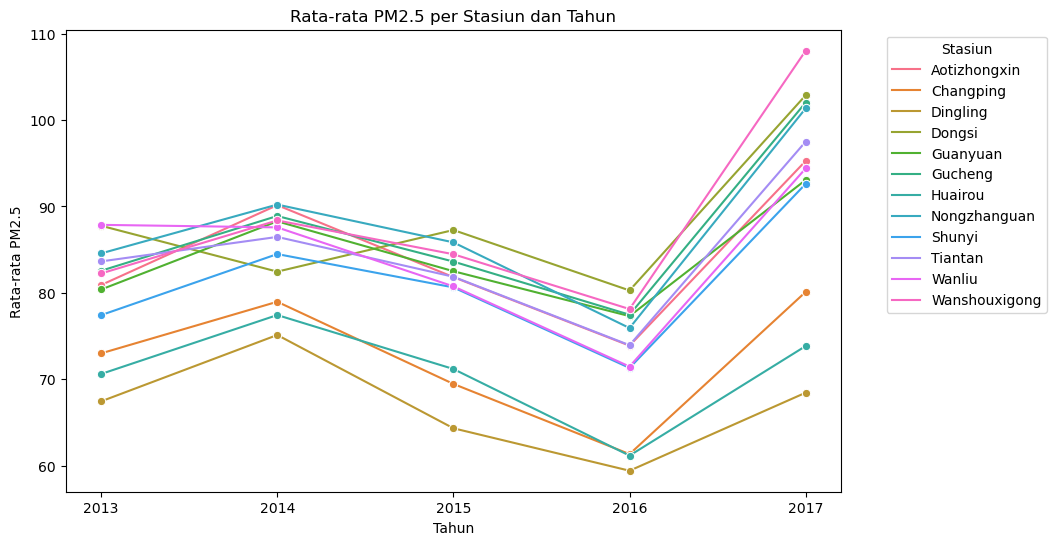

In [274]:
particle_df = merged_df.groupby(by=["station", "year"]).agg({
    "PM2.5": "mean",
    "PM10": "mean"
}).reset_index()

particle_df['year'] = particle_df['year'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='PM2.5', hue='station', data=particle_df, marker='o')

plt.title('Rata-rata PM2.5 per Stasiun dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

menurut acuan BMKG untuk partikulat pm2.5 (https://www.bmkg.go.id/kualitas-udara/informasi-partikulat-pm25.bmkg)

setiap stasiun berada di tingkat **Tidak Sehat** karena dalam rata-rata setahun menghasilkan partikulat pm2.5 dikisaran antara 55,5µg/m³ dan 150,4µg/m³

lalu pada tahun 2017 terjadi peningkatan PM2.5 secara signifikan di setiap station

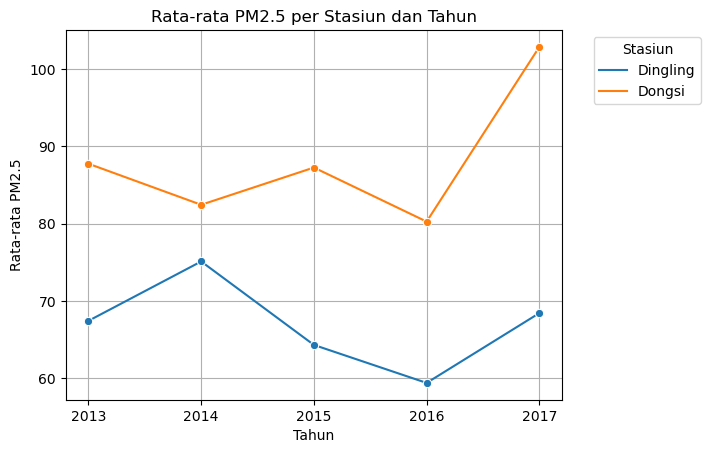

In [275]:
#mendapatkan mean dengan station
temp_df = merged_df.groupby(by=["station"]).agg({
    "PM2.5": "mean",
    "PM10": "mean"
}).reset_index()

#mendapatkan min dan max mean per station
min_pm25 = temp_df[temp_df['PM2.5'] == temp_df['PM2.5'].min()].reset_index().station[0]
max_pm25 = temp_df[temp_df['PM2.5'] == temp_df['PM2.5'].max()].reset_index().station[0]

#select baris berdasarkan min dan max diatas pada dataframe yang ada year nya
temp_station_year_pm25_df = merged_df.groupby(by=["station", "year"]).agg({
    "PM2.5": "mean",
}).reset_index()

temp_station_year_pm25_df['year'] = temp_station_year_pm25_df['year'].astype(str)

min_n_max_pm25_df = temp_station_year_pm25_df[(temp_station_year_pm25_df['station'] == min_pm25) | (temp_station_year_pm25_df['station'] == max_pm25)]

sns.lineplot(x='year', y='PM2.5', hue='station', data=min_n_max_pm25_df, marker='o')

plt.title('Rata-rata PM2.5 per Stasiun dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

lalu kita bisa membandingkan perbandingan tingkat PM2.5 yang terendah dengan yang terbesar secara rata-rata dari tahun 2013-2017

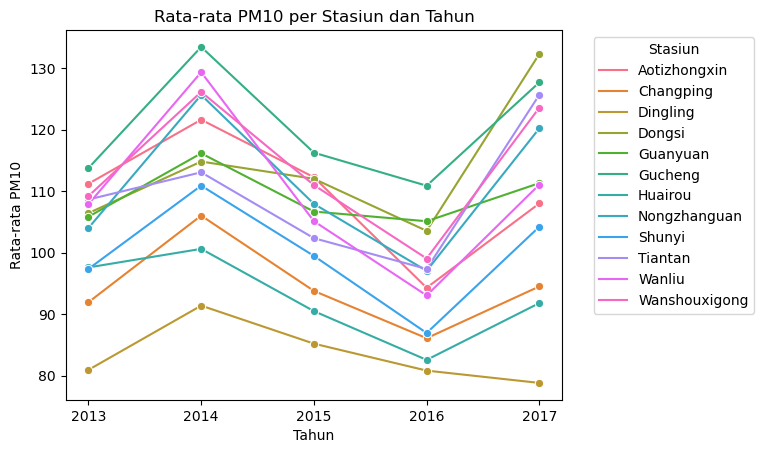

In [276]:
sns.lineplot(x='year', y='PM10', hue='station', data=particle_df, marker='o')
plt.title('Rata-rata PM10 per Stasiun dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM10')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

menurut acuan BMKG untuk partikulat pm10 (https://www.bmkg.go.id/kualitas-udara/informasi-partikulat-pm10.bmkg)

setiap stasiun berada di tingkat **Sedang** karena dalam rata-rata setahun menghasilkan partikulat pm10 dikisaran antara 51µg/m³ dan 150µg/m³

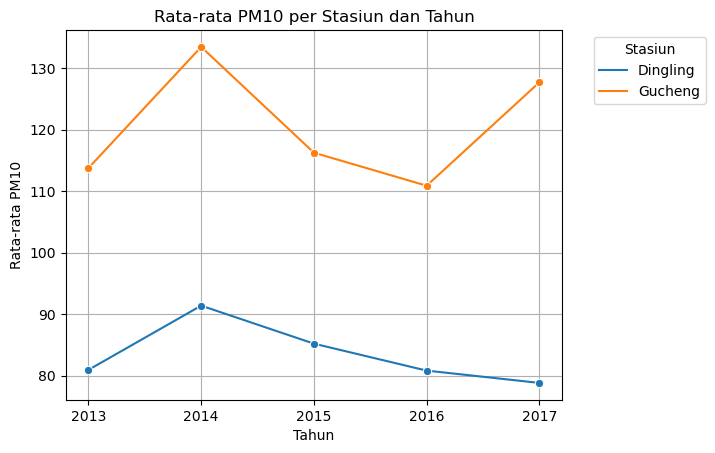

In [277]:
min_pm10 = temp_df[temp_df['PM10'] == temp_df['PM10'].min()].reset_index().station[0]
max_pm10 = temp_df[temp_df['PM10'] == temp_df['PM10'].max()].reset_index().station[0]

#select baris berdasarkan min dan max diatas pada dataframe yang ada year nya
temp_station_year_pm10_df = merged_df.groupby(by=["station", "year"]).agg({
    "PM10": "mean",
}).reset_index()
temp_station_year_pm10_df['year'] = temp_station_year_pm10_df['year'].astype(str)

min_n_max_pm10_df = temp_station_year_pm10_df[(temp_station_year_pm10_df['station'] == min_pm10) | (temp_station_year_pm10_df['station'] == max_pm10)]

sns.lineplot(x='year', y='PM10', hue='station', data=min_n_max_pm10_df, marker='o')

plt.title('Rata-rata PM10 per Stasiun dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM10')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

lalu kita bisa membandingkan perbandingan tingkat PM10 yang terendah dengan yang terbesar secara rata-rata dari tahun 2013-2017

terlihat bahwa **station dingling** selalu paling rendah dari segi partikel halus (PM 2.5) dan kasarnya (PM 10)

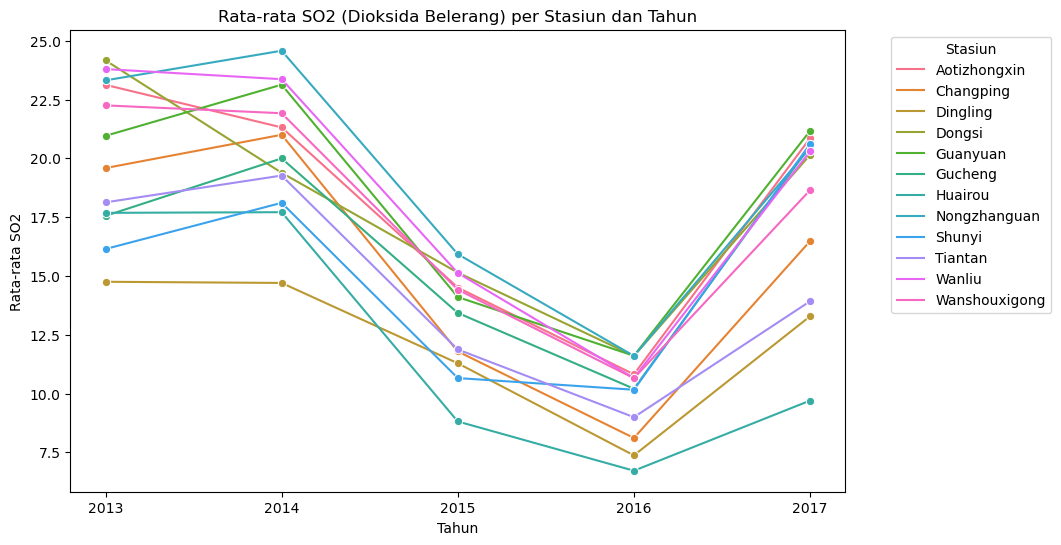

In [278]:
pollutant_gases_df = merged_df.groupby(by=["station", "year"]).agg({
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
}).reset_index()

pollutant_gases_df['year'] = pollutant_gases_df['year'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='SO2', hue='station', data=pollutant_gases_df, marker='o')

plt.title('Rata-rata SO2 (Dioksida Belerang) per Stasiun dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata SO2')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

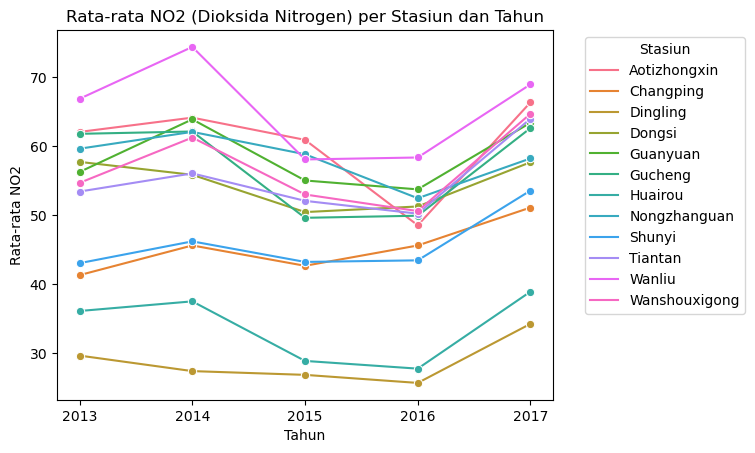

In [279]:
sns.lineplot(x='year', y='NO2', hue='station', data=pollutant_gases_df, marker='o')

plt.title('Rata-rata NO2 (Dioksida Nitrogen) per Stasiun dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata NO2')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

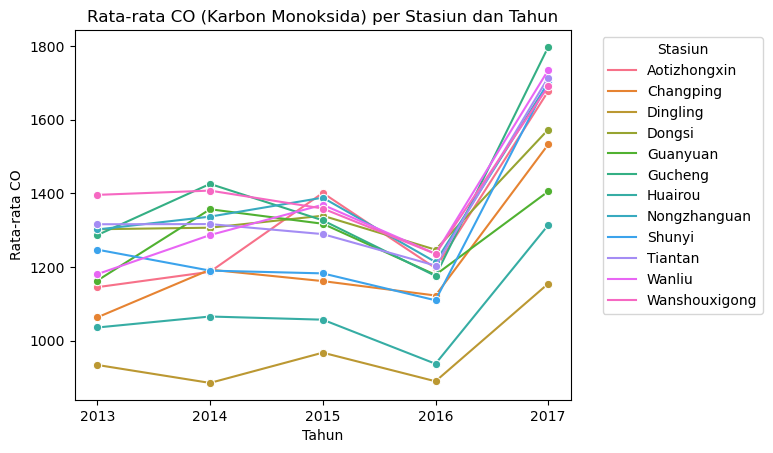

In [280]:
sns.lineplot(x='year', y='CO', hue='station', data=pollutant_gases_df, marker='o')

plt.title('Rata-rata CO (Karbon Monoksida) per Stasiun dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata CO')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

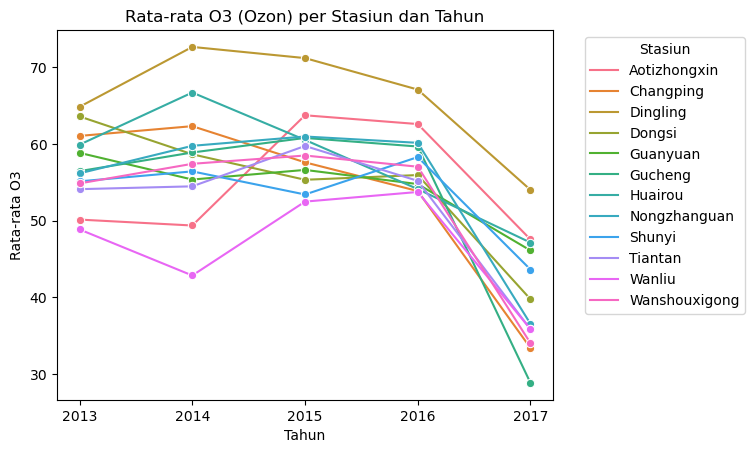

In [281]:
sns.lineplot(x='year', y='O3', hue='station', data=pollutant_gases_df, marker='o')

plt.title('Rata-rata O3 (Ozon) per Stasiun dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata O3')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

dari hasil diatas terlihat bahwa tiap 2017 terjadi penurunan kualitas udara di setiap stationnya secara signifikan dan
dari hasil diatas terlihat bahwa **station Dingling** mendominasi dalam kualitas udara yang baik diantara station lainnya.

### Pertanyaan 2: Apa hubungan besarnya ozon dengan kualitas udara?

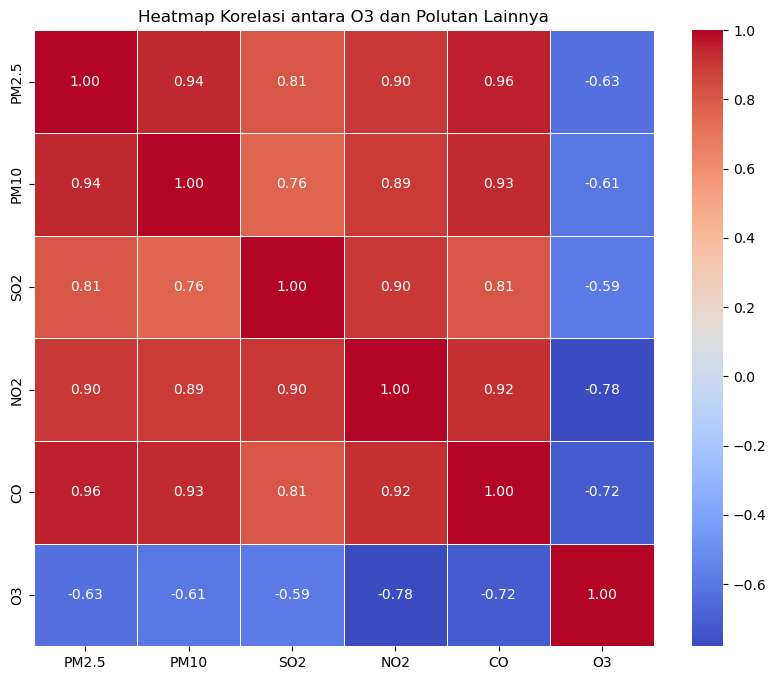

In [282]:
# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_polution, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi antara O3 dan Polutan Lainnya')
plt.show()

terlihat pada heatmap diatas bahwa korelasi O3 dengan polutan lainnya adalah korelasi negatif, dengan kata lain, ketika polutan O3 besar maka polutan lainnya kecil, dan sebaliknya

### Pertanyaan 3: Apa Pengaruh Cuaca Terhadap Kualitas Udara?

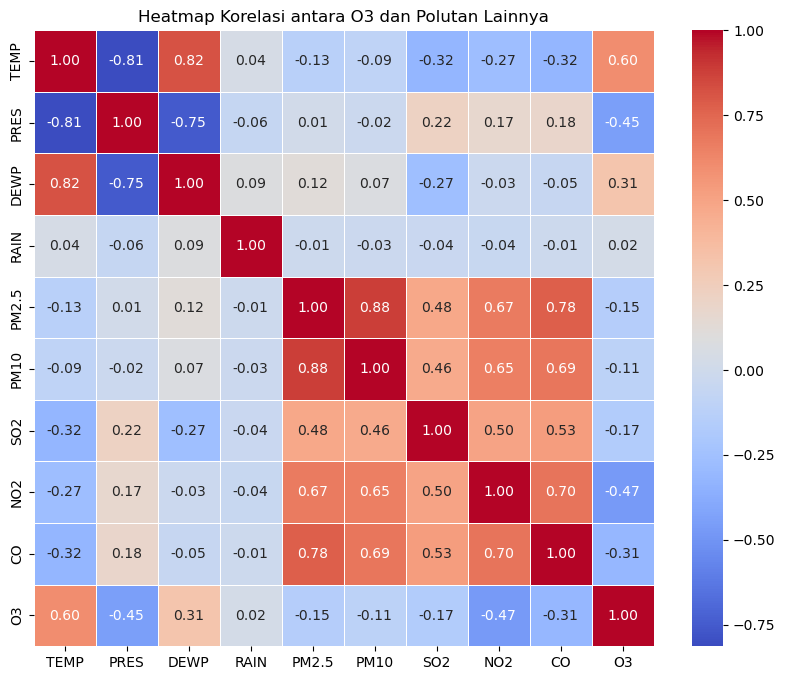

In [283]:
# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi antara Cuaca Terhadap Kualitas Udara')
plt.show()

pada heatmap diatas, menunjukan bahwa nilai korelasi `TEMP, PRES, DEWP, dan RAIN` tidak begitu kuat dengan polutan seperti `PM2.5, PM10, SO2, NO2, dan O3`, namun terlihat temperature (`TEMP`) lumayan mempengaruhi `O3`

### Pertanyaan 4: Apa Tren arah mata angin?

C:\Users\bryan\AppData\Local\Temp\ipykernel_169204\2288717154.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


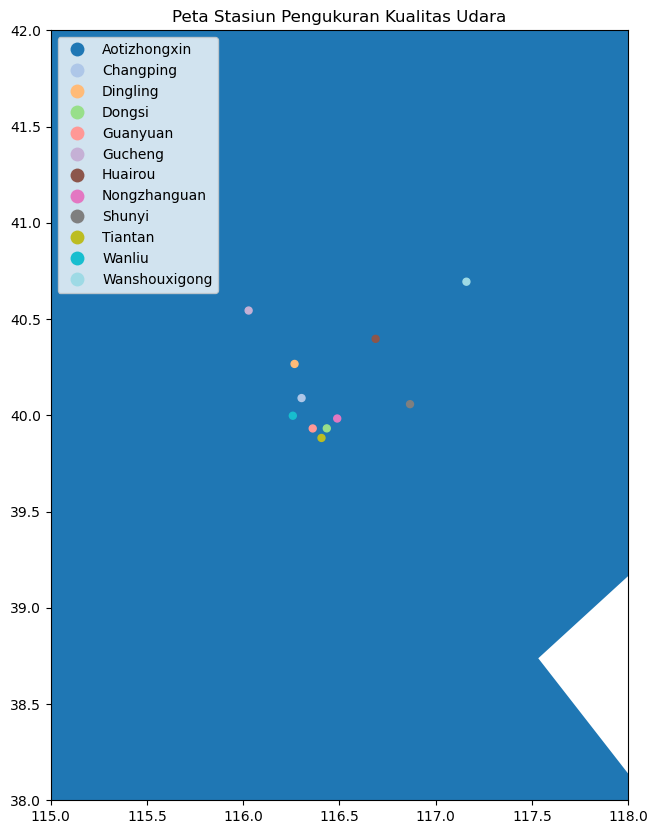

In [284]:
filtered_station_df = merged_df.groupby('station').agg({
    'PM2.5': 'mean',
    'wd': lambda x: x.mode().iat[0] if len(x.mode()) > 0 else None,  # Mengatasi multiple modes
    'long': lambda x: x.mode().iat[0],
    'lat': lambda x: x.mode().iat[0],
}).reset_index()

filtered_gdf = gpd.GeoDataFrame(filtered_station_df, geometry=gpd.points_from_xy(filtered_station_df.long, filtered_station_df.lat))

# Plot peta dengan stasiun
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))
filtered_gdf.plot(ax=ax, column='station', marker='o', markersize=25, cmap='tab20', legend=True, categorical=True)
plt.title('Peta Stasiun Pengukuran Kualitas Udara')

plt.xlim(115, 118)
plt.ylim(38, 42)

plt.show()

terlihat persebaran tiap **station** diatas, dan selanjutnya kita akan mencari tau tren arah angin

C:\Users\bryan\AppData\Local\Temp\ipykernel_169204\3104939955.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


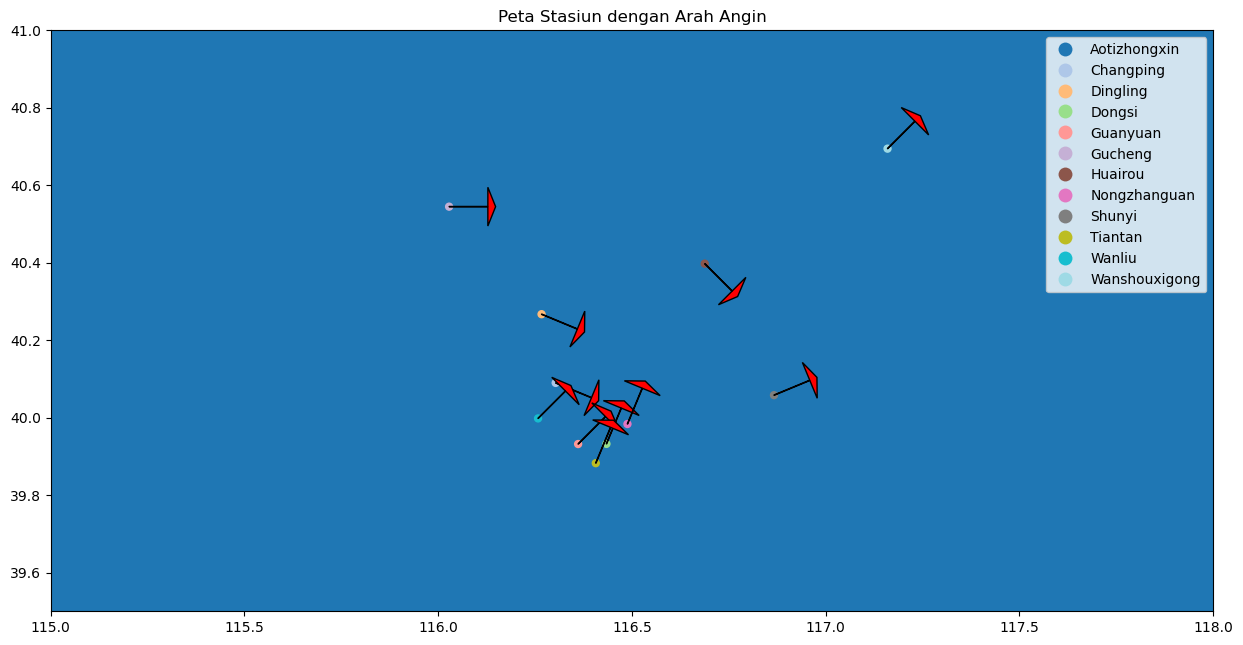

In [285]:
# Plot peta dengan stasiun
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))
filtered_gdf.plot(ax=ax, column='station', marker='o', markersize=25, cmap='tab20', legend=True, categorical=True)

# Konversi arah angin ke derajat
wind_directions = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Fungsi untuk membuat panah berdasarkan arah angin
def arrow(x):
    angle_deg = wind_directions.get(x, 0)  # Menggunakan 0 jika arah angin tidak terdaftar
    angle_rad = np.radians(angle_deg)
    return 0.1 * np.cos(angle_rad), 0.1 * np.sin(angle_rad)

# Menambahkan panah untuk setiap stasiun
for i, row in filtered_station_df.iterrows():
    ax.arrow(row['long'], row['lat'], *arrow(row['wd']), head_width=0.1, head_length=0.02, fc='red')

plt.title('Peta Stasiun dengan Arah Angin')
plt.xlim(115, 118)
plt.ylim(39.5, 41)

plt.show()

In [286]:
filtered_gdf

,station,PM2.5,wd,long,lat,geometry
0,Aotizhongxin,82.237590,NE,123.456600,41.744500,POINT (123.45660 41.74450)
1,Changping,70.948803,NNW,116.303100,40.089400,POINT (116.30310 40.08940)
2,Dingling,66.660034,NNW,116.266670,40.266670,POINT (116.26667 40.26667)
3,Dongsi,85.129510,ENE,116.434100,39.932000,POINT (116.43410 39.93200)
4,Guanyuan,82.610216,NE,116.361019,39.931582,POINT (116.36102 39.93158)
5,Gucheng,83.867186,N,116.028085,40.544199,POINT (116.02808 40.54420)
6,Huairou,70.217951,NW,116.687800,40.397100,POINT (116.68780 40.39710)
7,Nongzhanguan,84.782776,ENE,116.488300,39.983246,POINT (116.48830 39.98325)
8,Shunyi,79.245241,NNE,116.866500,40.057700,POINT (116.86650 40.05770)
9,Tiantan,81.917994,ENE,116.406600,39.882200,POINT (116.40660 39.88220)


terlihat dari informasi diatas, bahwa arah mata angin dominan mengarah ke arah Utara, lalu kita akan melakukan clustering

Cluster 1: 3 stasiun
        station      PM2.5   wd      long        lat  \
3        Dongsi  85.129510  ENE  116.4341  39.932000   
7  Nongzhanguan  84.782776  ENE  116.4883  39.983246   
9       Tiantan  81.917994  ENE  116.4066  39.882200   

                     geometry  
3  POINT (116.43410 39.93200)  
7  POINT (116.48830 39.98325)  
9  POINT (116.40660 39.88220)  
Cluster 2: 1 stasiun
   station      PM2.5 wd        long        lat                    geometry
5  Gucheng  83.867186  N  116.028085  40.544199  POINT (116.02808 40.54420)
Cluster 3: 4 stasiun
          station      PM2.5  wd        long        lat  \
0    Aotizhongxin  82.237590  NE  123.456600  41.744500   
4        Guanyuan  82.610216  NE  116.361019  39.931582   
10         Wanliu  81.998167  NE  116.257600  39.997700   
11  Wanshouxigong  84.320538  NE  117.159503  40.693878   

                      geometry  
0   POINT (123.45660 41.74450)  
4   POINT (116.36102 39.93158)  
10  POINT (116.25760 39.99770)  
11  

C:\Users\bryan\AppData\Local\Temp\ipykernel_169204\4268422691.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


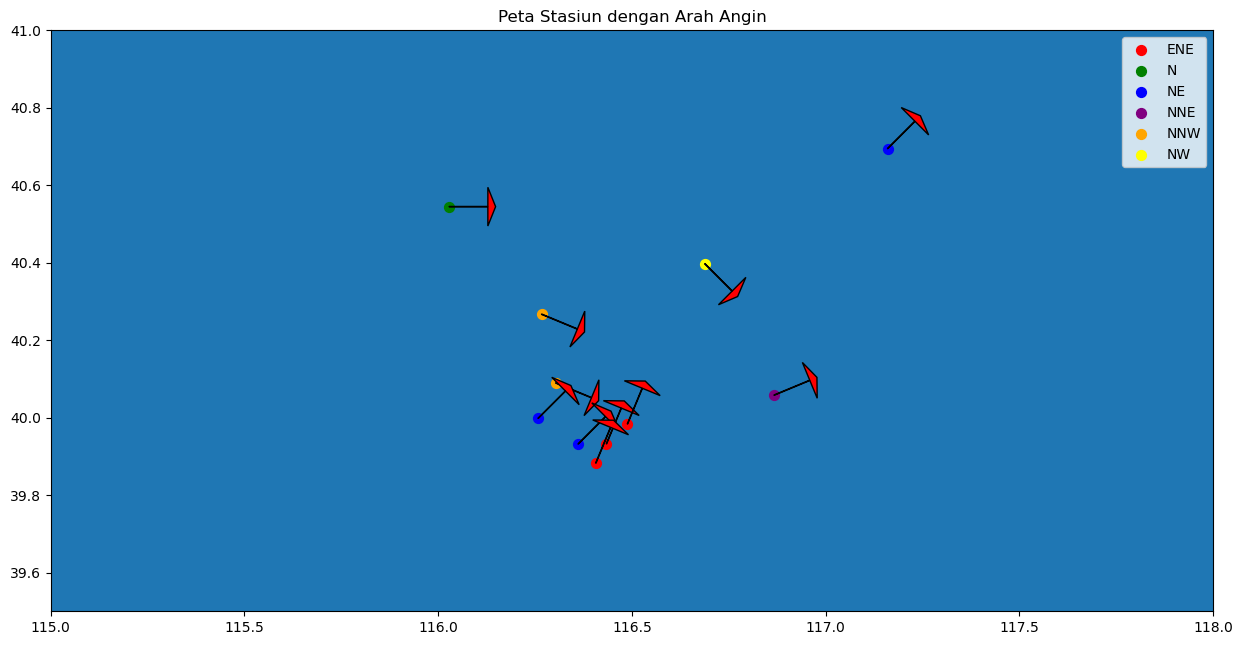

In [287]:
clusters = []
for wd, group in filtered_gdf.groupby('wd'):
    clusters.append(group)

# Tampilkan hasil clustering
for i, cluster in enumerate(clusters):
    print(f'Cluster {i+1}: {len(cluster)} stasiun')
    print(cluster)
    
# Plot peta dengan stasiun yang diwarnai berdasarkan cluster
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))

# Plot stasiun dalam setiap cluster dengan warna berbeda
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow']
for i, cluster in enumerate(clusters):
    cluster.plot(ax=ax, marker='o', markersize=50, color=colors[i % len(colors)], label=cluster['wd'].iloc[0])
    
for i, row in filtered_station_df.iterrows():
    ax.arrow(row['long'], row['lat'], *arrow(row['wd']), head_width=0.1, head_length=0.02, fc='red')

plt.title('Peta Stasiun dengan Arah Angin')
plt.xlim(115, 118)
plt.ylim(39.5, 41)
plt.legend()
plt.show()

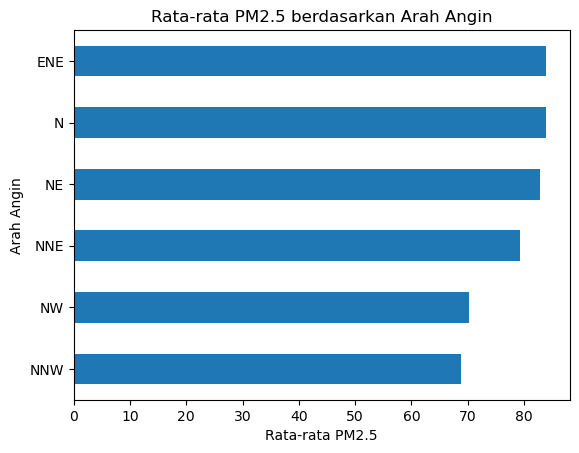

In [288]:
clustered_df = pd.concat(clusters)
grouped_cluster_df = clustered_df.groupby(by=["wd"]).agg({
    'PM2.5': 'mean'
})

grouped_cluster_df = grouped_cluster_df.sort_values(by='PM2.5', ascending=True)

grouped_cluster_df.plot(kind='barh', legend=False)
plt.title('Rata-rata PM2.5 berdasarkan Arah Angin')
plt.ylabel('Arah Angin')
plt.xlabel('Rata-rata PM2.5')
plt.show()

In [294]:
clustered_df.groupby(by=["wd", "station"]).agg({
    'PM2.5': 'mean'
})

PM2.5
wd  station                 
ENE Dongsi         85.129510
    Nongzhanguan   84.782776
    Tiantan        81.917994
N   Gucheng        83.867186
NE  Aotizhongxin   82.237590
    Guanyuan       82.610216
    Wanliu         81.998167
    Wanshouxigong  84.320538
NNE Shunyi         79.245241
NNW Changping      70.948803
    Dingling       66.660034
NW  Huairou        70.217951

informasi diatas adalah trend arah angin disertai dengan rata-rata polutan yang dibawa oleh arah angin tersebut, terlihat bahwa cluster mata angin **ENE (Dongsi, Nongzhanguan, Tiantan)** memiliki rata-rata nilai polutan *PM2.5* terbesar diantara arah angin lainnya

# Conclusion

- Tren tingkat polusi berdasarkan polutan *PM2.5* menunjukan kualitas udara yang **Tidak Sehat** setiap tahunnya dan meningkat pada saat 2017, setiap polutan mengalami peningkatan yang signifikan pada tahun 2017 kecuali polutan ***O3*** (Ozon), dan station Dingling memiliki kualitas terbaik diantara station lainnya
- hubungan besarnya ozon dengan kualitas udara menunjukan korelasi negatif, dimana bila ozon berkurang maka polutan lainnya meningkat dan sebaliknya
- Pengaruh Cuaca Terhadap Kualitas Udara seperti ***TEMP, PRES, DEWP, dan RAIN*** tidak begitu kuat dengan polutan seperti PM2.5, PM10, SO2, NO2, dan O3, namun terlihat temperature (TEMP) lumayan mempengaruhi ***O3***
- Tren arah mata angin menunjukan station dengan arah mata angin ***NE*** adalah yang paling banyak dilalui sepanjang tahun, dan juga pada kelompok ***ENE*** memiliki polutan *PM2.5* terbanyak, diikuti dengan mata angin ***N dan NE***, lalu mata angin ***NNW dan NW*** memiliki nilai polutan *PM2.5* terendah diantara arah mata angin lainnya.